### 데이터튜닝
1. 주식 데이터를 가지고 데이터 갯수 1000개 선택
2. 데이터를 csv로 변환
3. csv를 DB 삽입
4. mysql query 데이터를  받아오는데(Module생성, Class구성)
5. 주식의 기준 -> 시가,종가,고가,저가 소수점 2번째 자리까지 반올림
6. 주식 기준 nan 값 존재할 경우 시작되는 지점의 시가로 변환
7. 컬럼 추가 : 종가-시가 값 삽입
8. 컬럼 추가 : 등락폭/시가*100퍼센트 삽입 
9. 데이터 시각화 

In [1]:
import yfinance as yf

In [2]:
a = yf.download('005930.KS').head(1000)
a.to_csv("samsung.csv")

[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import m_sql

In [5]:
_dt = m_sql.Database()

In [6]:
sql = "select*from samsung"
result=_dt.executeAll(sql)

In [17]:
sam = pd.DataFrame(result)
sam

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4675.783691,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4270.192383,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4300.803223,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4239.580566,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4415.592285,46880000
...,...,...,...,...,...,...,...
995,2003-10-28,8970.0,9290.0,8900.0,9240.0,7071.068848,32095000
996,2003-10-29,9420.0,9480.0,9330.0,9340.0,7147.596680,34570000
997,2003-10-30,9400.0,9440.0,9320.0,9420.0,7208.819336,20885000
998,2003-10-31,9500.0,9510.0,9270.0,9400.0,7193.512695,24580000


In [18]:
sam["Adj Close"]= sam["Adj Close"].round(2)

In [20]:
sam.fillna(6000)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4675.78,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4270.19,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4300.80,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4239.58,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4415.59,46880000
...,...,...,...,...,...,...,...
995,2003-10-28,8970.0,9290.0,8900.0,9240.0,7071.07,32095000
996,2003-10-29,9420.0,9480.0,9330.0,9340.0,7147.60,34570000
997,2003-10-30,9400.0,9440.0,9320.0,9420.0,7208.82,20885000
998,2003-10-31,9500.0,9510.0,9270.0,9400.0,7193.51,24580000


In [28]:
sam["Range"] = sam.Open - sam.Close
sam

,Date,Open,High,Low,Close,Adj Close,Volume,Range,p
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4675.78,74195000,-110.0,-1.833333
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4270.19,74680000,220.0,3.793103
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4300.80,54390000,130.0,2.260870
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4239.58,40305000,20.0,0.359712
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4415.59,46880000,-170.0,-3.035714
...,...,...,...,...,...,...,...,...,...
995,2003-10-28,8970.0,9290.0,8900.0,9240.0,7071.07,32095000,-270.0,-3.010033
996,2003-10-29,9420.0,9480.0,9330.0,9340.0,7147.60,34570000,80.0,0.849257
997,2003-10-30,9400.0,9440.0,9320.0,9420.0,7208.82,20885000,-20.0,-0.212766
998,2003-10-31,9500.0,9510.0,9270.0,9400.0,7193.51,24580000,100.0,1.052632


In [29]:
sam["p"] =(sam.Range/sam.Open)*100
sam

,Date,Open,High,Low,Close,Adj Close,Volume,Range,p
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4675.78,74195000,-110.0,-1.833333
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4270.19,74680000,220.0,3.793103
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4300.80,54390000,130.0,2.260870
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4239.58,40305000,20.0,0.359712
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4415.59,46880000,-170.0,-3.035714
...,...,...,...,...,...,...,...,...,...
995,2003-10-28,8970.0,9290.0,8900.0,9240.0,7071.07,32095000,-270.0,-3.010033
996,2003-10-29,9420.0,9480.0,9330.0,9340.0,7147.60,34570000,80.0,0.849257
997,2003-10-30,9400.0,9440.0,9320.0,9420.0,7208.82,20885000,-20.0,-0.212766
998,2003-10-31,9500.0,9510.0,9270.0,9400.0,7193.51,24580000,100.0,1.052632


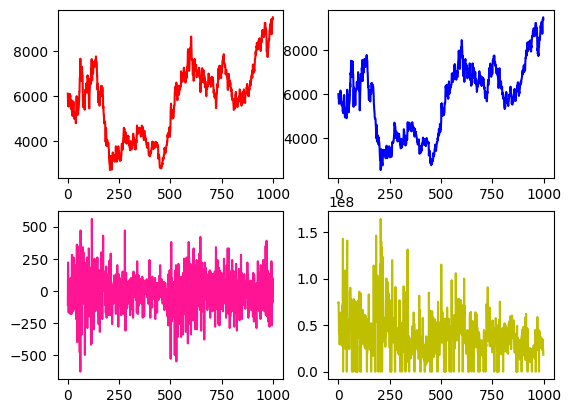

In [62]:
plt.subplot(2,2,1)
plt.plot(sam.Close,'r')
plt.subplot(2,2,2)
plt.plot(sam.Open,'b')
plt.subplot(2,2,3)
plt.plot(sam.Range,'deeppink')
plt.subplot(2,2,4)
plt.plot(sam.Volume,'y')
#plt.plot(sam.Volume)

In [48]:
#캔들차트 만들기 
import mplfinance as mpf

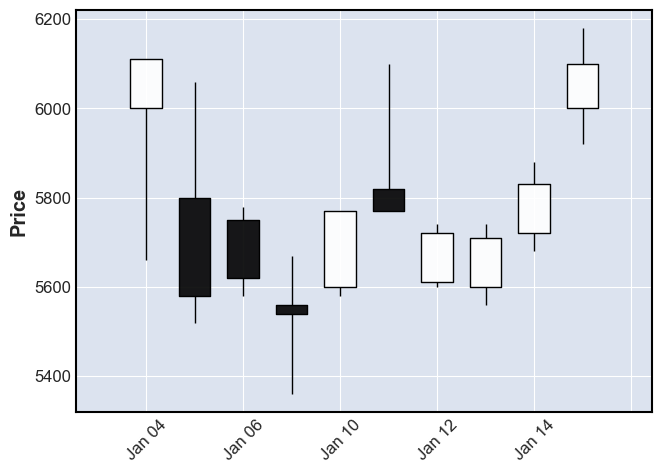

In [51]:
mpf.plot(a.head(10), type='candle')

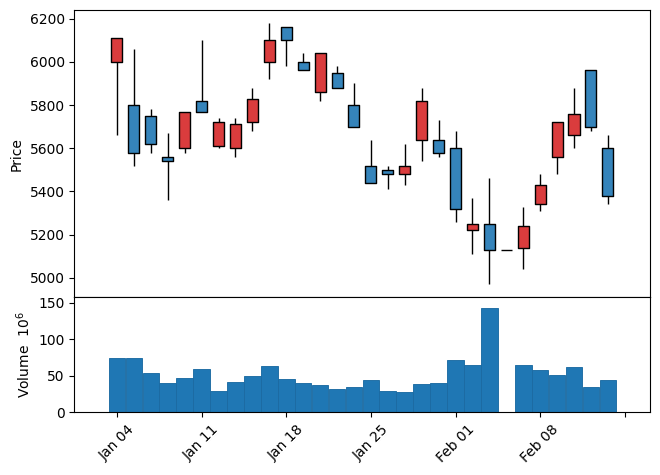

In [54]:
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue',volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
mpf.plot(a[:30], type='candle',volume=True,style=s)